[[1039    0    0    0    0    0    0    0    0   23]
 [   0  931    0    0    0    0    0    4    0    0]
 [   0    0  979    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0  955    6    0    0    0    0]
 [   0    0    0    0    0  969    0    0    0    0]
 [   0    0    0    0    0    0  953    0    0    0]
 [  10    0    0    0    0    0    0  931    0    0]
 [   0    0    0    0    0    0    0    0  985    0]
 [   2    0    0    0    0    0    0    0    0 1151]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1062
           1       1.00      1.00      1.00       935
           2       1.00      1.00      1.00       979
           3       1.00      1.00      1.00       939
           4       1.00      0.99      1.00       961
           5       0.99      1.00      1.00       969
           6       1.00      1.00      1.00       953
           7       1.00      0.99   

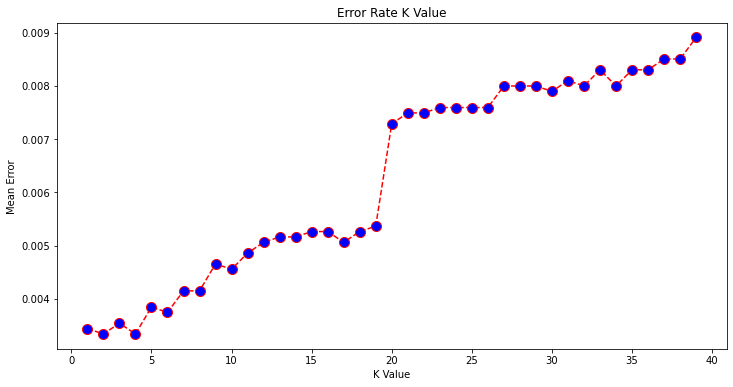

[0.0034423407917383822, 0.003341095474334312, 0.003543586109142452, 0.003341095474334312, 0.0038473220613546625, 0.003746076743950592, 0.0041510580135668725, 0.0041510580135668725, 0.0046572846005872226, 0.004556039283183153, 0.004859775235395363, 0.005062265870203503, 0.0051635111876075735, 0.0051635111876075735, 0.005264756505011643, 0.005264756505011643, 0.005062265870203503, 0.005264756505011643, 0.005366001822415713, 0.007289662853093045, 0.007492153487901184, 0.007492153487901184, 0.007593398805305254, 0.007593398805305254, 0.007593398805305254, 0.007593398805305254, 0.007998380074921535, 0.007998380074921535, 0.007998380074921535, 0.007897134757517466, 0.008099625392325605, 0.007998380074921535, 0.008302116027133745, 0.007998380074921535, 0.008302116027133745, 0.008302116027133745, 0.008504606661941885, 0.008504606661941885, 0.008909587931558166]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

names = ['thumb', 'index', 'middle', 'ring', 'little', 'class']
dataset = pd.read_csv('fingerdata_forknn1.csv', names=names)
dataset_test = pd.read_csv('fingerdata.csv', names=names)
dataset_test = dataset_test.sample(frac=0.8)

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test



classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)

In [11]:
X_train

array([[-0.27      , -0.13888889, -0.24444444, -0.25      , -0.31428571],
       [-0.05      ,  0.05555556,  0.12222222,  0.20555556, -0.20952381],
       [-0.225     , -0.14444444, -0.16111111, -0.32777778,  0.19047619],
       ...,
       [-0.205     , -0.14444444, -0.12777778, -0.08888889,  0.18095238],
       [-0.05      ,  0.02777778, -0.1       , -0.11111111, -0.31428571],
       [-0.19      , -0.12777778, -0.11666667, -0.06111111,  0.07619048]])

X_train is [[ 0.78284026  1.39707102  0.93053045 -1.0795669   0.05759879]
 [-0.28819153 -0.90490843 -0.8198106   0.87390719 -0.61473311]
 [-0.27737303 -0.74795528 -0.8198106   0.59776164 -0.59435942]
 ...
 [-0.5370171  -0.31633414 -0.47406422  0.98641093  1.15777826]
 [ 1.46440595  1.26627674  1.41673629 -1.08979451 -0.71660158]
 [ 1.03166583  1.09624416  1.14662194 -0.75228328 -0.26838032]]
[[524   0   0   0   0   0   1   8   0  85]
 [  0 529  16   0   0   0   0   0   3   2]
 [  0   0 614   0   0   0   0   4   0   0]
 [  0   0   0 590   0   0   1   0   0   0]
 [  0   0   0   0 591  11   0   0   0   0]
 [  0   0   0   0   0 599   0   0   0   0]
 [  3   0   0   0   0   0 590   0   0   0]
 [  0   1   2   0   0   0   0 574   0  35]
 [  0   1   0   0   0   0   0   0 602   0]
 [ 35   1   0   0   0   0   0   0   0 578]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       618
           1       0.99      0.96      0.98       550
           

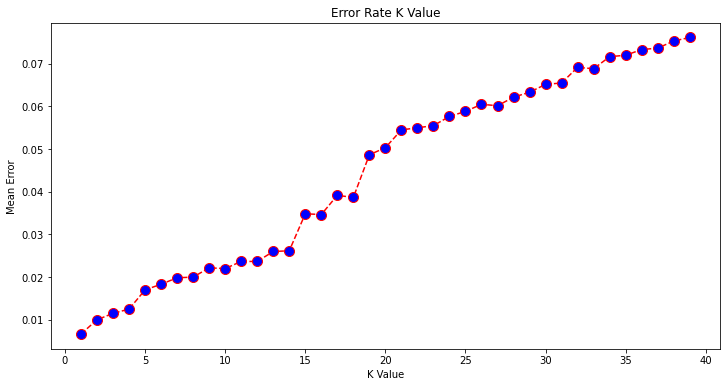

[0.006666666666666667, 0.01, 0.0115, 0.0125, 0.017, 0.018333333333333333, 0.019833333333333335, 0.02, 0.022166666666666668, 0.022, 0.023666666666666666, 0.023666666666666666, 0.026, 0.026166666666666668, 0.034833333333333334, 0.034666666666666665, 0.03916666666666667, 0.03866666666666667, 0.048666666666666664, 0.050333333333333334, 0.0545, 0.055, 0.0555, 0.057666666666666665, 0.058833333333333335, 0.0605, 0.06016666666666667, 0.06216666666666667, 0.06333333333333334, 0.06516666666666666, 0.0655, 0.06916666666666667, 0.06883333333333333, 0.07166666666666667, 0.072, 0.07333333333333333, 0.07366666666666667, 0.07533333333333334, 0.07616666666666666]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
    
#data = np.empty([1,6])
x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = x_test
X_test = scaler.transform(X_test)


y_train = train.iloc[:, 5].values

print("X_train is {}".format(X_train))
#y_train = np.reshape(y_train, (-1, 1))
#train = np.hstack((x_train, y_train))
#np.around(train, decimals=1)

#for i in range(10):
#    mask = train[:, -1] == i
#    train1 = train[mask, :]
#    data = np.concatenate((data, train[np.random.choice(train.shape[0], 110, replace=False), :]))
    
#print("data is {}".format(data))

#X_train = data[:,[0,1,2,3,4]]
#y_train = data[:,-1]

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test



classifier = KNeighborsClassifier(n_neighbors=15)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)

X_train is [[ 0.78284026  1.39707102  0.93053045 -1.0795669   0.05759879]
 [-0.28819153 -0.90490843 -0.8198106   0.87390719 -0.61473311]
 [-0.27737303 -0.74795528 -0.8198106   0.59776164 -0.59435942]
 ...
 [-0.5370171  -0.31633414 -0.47406422  0.98641093  1.15777826]
 [ 1.46440595  1.26627674  1.41673629 -1.08979451 -0.71660158]
 [ 1.03166583  1.09624416  1.14662194 -0.75228328 -0.26838032]]
[[1194    0    0    0    0    0    1   12    0  175]
 [   0 1412   25    0    0    0    0    0    9    4]
 [   0    0 1376    0    0    0    0    5    1    0]
 [   0    0    0 1402    0    0    7    0    0    0]
 [   0    0    0    0 1370   28    0    0    0    0]
 [   0    0    0    0    1 1400    0    0    0    0]
 [   3    0    0    0    0    0 1403    0    0    1]
 [   0    0    1    0    0    0    0 1302    0   85]
 [   0    3    0    0    0    0    0    0 1394    0]
 [ 113    3    0    0    0    0    0    0    0 1270]]
              precision    recall  f1-score   support

           0       

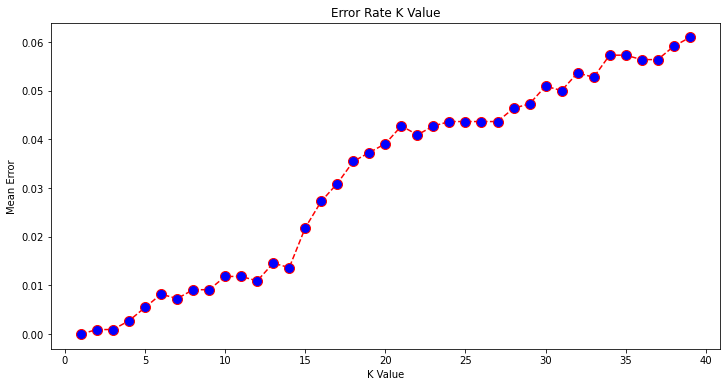

[0.0, 0.0009099181073703367, 0.0009099181073703367, 0.00272975432211101, 0.00545950864422202, 0.00818926296633303, 0.007279344858962694, 0.009099181073703366, 0.009099181073703366, 0.011828935395814377, 0.011828935395814377, 0.01091901728844404, 0.014558689717925387, 0.01364877161055505, 0.02183803457688808, 0.0272975432211101, 0.030937215650591446, 0.03548680618744313, 0.0373066424021838, 0.039126478616924476, 0.042766151046405826, 0.04094631483166515, 0.042766151046405826, 0.04367606915377616, 0.04367606915377616, 0.04367606915377616, 0.04367606915377616, 0.04640582347588717, 0.047315741583257506, 0.050955414012738856, 0.05004549590536852, 0.05368516833484986, 0.052775250227479524, 0.05732484076433121, 0.05732484076433121, 0.056414922656960874, 0.056414922656960874, 0.059144676979071886, 0.060964513193812554]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
    
#data = np.empty([1,6])
x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train1 = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_train = scaler.transform(x_train)
X_test = x_test
X_test = scaler.transform(X_test)


y_train = train.iloc[:, 5].values

print("X_train is {}".format(X_train))
#y_train = np.reshape(y_train, (-1, 1))
#train = np.hstack((x_train, y_train))
#np.around(train, decimals=1)

#for i in range(10):
#    mask = train[:, -1] == i
#    train1 = train[mask, :]
#    data = np.concatenate((data, train[np.random.choice(train.shape[0], 110, replace=False), :]))
    
#print("data is {}".format(data))

#X_train = data[:,[0,1,2,3,4]]
#y_train = data[:,-1]

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test



classifier = KNeighborsClassifier(n_neighbors=15)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(x_train)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_train1, y_pred))
print(classification_report(y_train1, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    error.append(np.mean(pred_i != y_train))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)